C:\Users\bezat\AppData\Local\Temp\ipykernel_17120\3032781573.py:13: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


Initial shape: (9609797, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), 

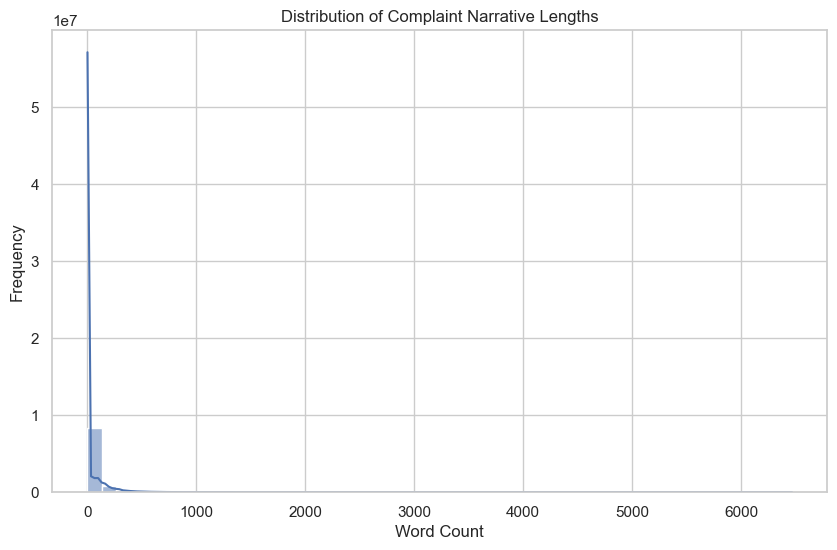

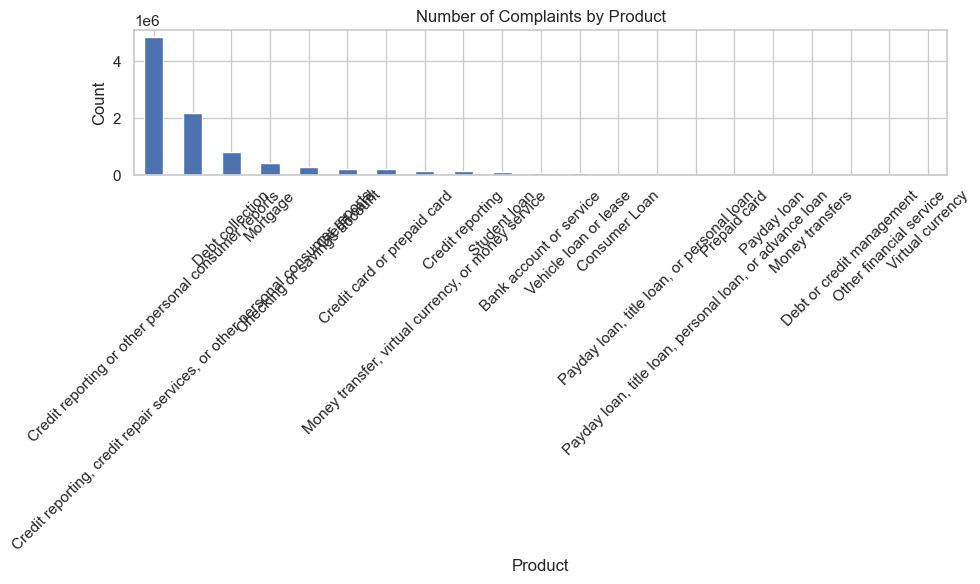

After product filtering: (232040, 19)
After dropping empty narratives: (82164, 19)
Saved cleaned data to ..\data\filtered_complaints.csv


In [ ]:
# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pathlib import Path

# Set plotting styles
sns.set(style="whitegrid")


data_path = Path("../data/raw/complaints.csv")
df = pd.read_csv(data_path)
print(f"Initial shape: {df.shape}")
df.head()

    # 3. Basic Info
df.info()
df.describe()

# 4. Check nulls in 'Consumer complaint narrative'
missing_narratives = df["Consumer complaint narrative"].isna().sum()
print(f"Missing complaint narratives: {missing_narratives}")

# 5. Add column for narrative word count
df["narrative_length"] = df["Consumer complaint narrative"].fillna("").apply(lambda x: len(x.split()))

# Plot histogram of narrative lengths
plt.figure(figsize=(10, 6))
sns.histplot(df["narrative_length"], bins=50, kde=True)
plt.title("Distribution of Complaint Narrative Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# 6. Product Distribution
plt.figure(figsize=(10, 6))
df["Product"].value_counts().plot(kind="bar")
plt.title("Number of Complaints by Product")
plt.xlabel("Product")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Filter to relevant 5 products
target_products = [
    "Credit card", 
    "Personal loan", 
    "Buy Now, Pay Later", 
    "Savings account", 
    "Money transfers"
]

df_filtered = df[df["Product"].isin(target_products)]
print(f"After product filtering: {df_filtered.shape}")

# 8. Drop rows with no complaint narrative
df_filtered = df_filtered.dropna(subset=["Consumer complaint narrative"])
print(f"After dropping empty narratives: {df_filtered.shape}")

# 9. Clean the text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", "", text)  # remove special characters
    text = re.sub(r"\s+", " ", text).strip()  # remove extra whitespace
    return text

df_filtered["cleaned_narrative"] = df_filtered["Consumer complaint narrative"].apply(clean_text)

# 10. Save the cleaned and filtered data
output_path = Path("../data/filtered_complaints.csv")
df_filtered.to_csv(output_path, index=False)
print(f"Saved cleaned data to {output_path}")
